In [5]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import urllib.request
import numpy as np
import time

Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 7974MiB)
Setup complete ✅ (2 CPUs, 7.8 GB RAM, 48.8/96.7 GB disk)


In [ ]:
image_classifier = YOLO("yolov8x-cls.pt")

In [ ]:
#url = "/content/tom fake 3.jpg"
url = "https://ultralytics.com/images/bus.jpg"
results = image_classifier(url)
#print(results)
names_dict = results[0].names
probs = results[0].probs.data.tolist()
#print(names_dict)
#print(probs)

print(names_dict[np.argmax(probs)])

In [ ]:
print("Classes with a probability above 0.5:")
for i, prob in enumerate(probs):
    if prob > 0.1:
        print(f"{names_dict[i]}: {prob:.2f}")

In [6]:
# Load the YOLO object detection model
start = time.time()
object_detector = YOLO("yolov8x.pt")  # Make sure to use the correct model weights file
loading_time = time.time()-start
print(f"Loading time: {loading_time}")

100%|████████████████████████████████████████████████████████████████████████████████| 131M/131M [00:02<00:00, 50.1MB/s]


Loading time: 4.103542327880859


In [16]:
# Perform object detection on an image (the image can be a local path or a URL)
image_path = "dog park.jpg"

# Check if the path is a URL or a local file and load the image accordingly
if image_path.startswith('http'):
    with urllib.request.urlopen(image_path) as url:
        image = Image.open(url)
else:
    image = Image.open(image_path)  # Open local image directly

image_np = np.array(image)  # Convert PIL Image to numpy array for matplotlib

In [17]:
start = time.time()
results = object_detector(image)
detection_time = time.time()-start
print(f"Detection time: {detection_time}")


0: 480x640 7 persons, 3 traffic lights, 3 benchs, 8 dogs, 2 umbrellas, 1 sports ball, 1 bottle, 58.3ms
Speed: 2.4ms preprocess, 58.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Detection time: 0.08839225769042969


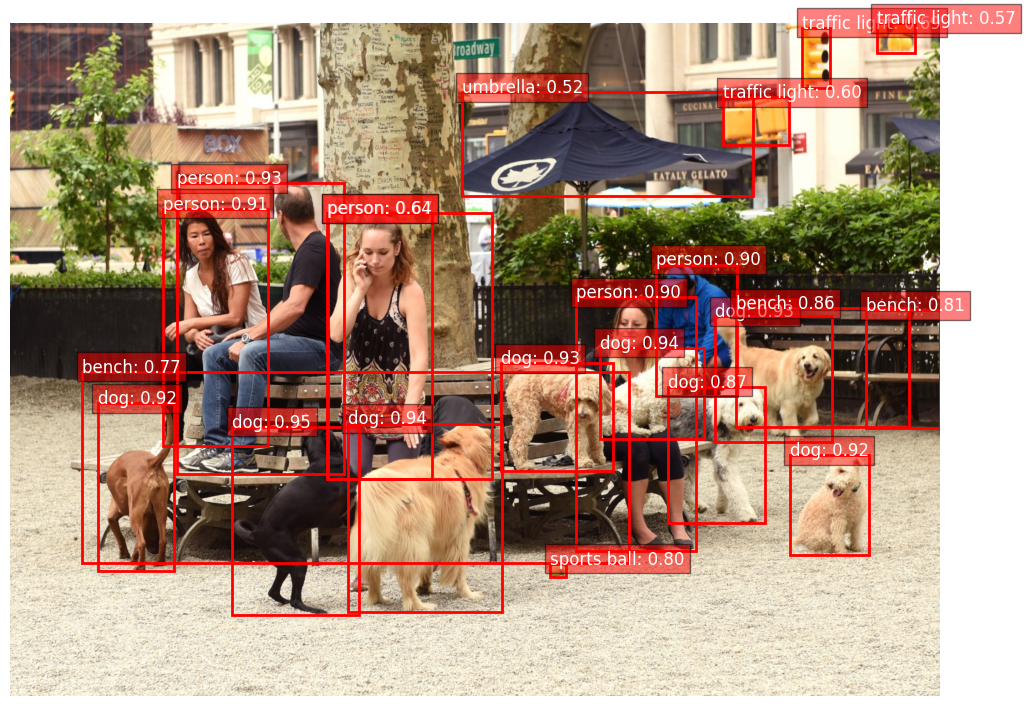

In [20]:
# Set up the plot
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image_np)  # Display the image

# Iterate over the results
for result in results:
    # Access the correct attributes for class id, box coordinates, and confidence
    for i, box in enumerate(result.boxes):
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Unpack bounding box coordinates
        conf = box.conf.item()  # Confidence score
        class_id = box.cls.item()  # Class ID
        if conf > 0.5:  # Only display boxes with confidence greater than 50%
            class_name = result.names[int(class_id)]  # Get class name using class ID
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(x1, y1, f"{class_name}: {conf:.2f}", color='white', fontsize=12,
                     bbox=dict(facecolor='red', alpha=0.5))

# Show the image with bounding boxes
plt.axis('off')  # Turn off axis
plt.savefig('dog park bb.png')
plt.show()

In [19]:
plt.savefig('dog park bb.png')

<Figure size 640x480 with 0 Axes>